# Convolutional Neural Network Example

We build a simple, 1 convolutional and 1 dense layer neural  net and test it on MNIST dataset.


## Preliminaries

### Imports

In [1]:
import pickle

import numpy as np
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

print(tf.__version__)


import matplotlib.pyplot as plt

%matplotlib inline

import sys
sys.path.append("../..")
import E4525_ML.mnist as mnist
from E4525_ML.notebook_utils import get_logger,LoggingCallback

1.13.1


In [2]:
logger=get_logger("CNN_Fashion_MNIST.log")

In [3]:
#
from tensorflow.keras.backend import set_session

config = tf.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
                                    # (nothing gets printed in Jupyter, only if you run it standalone)

sess = tf.Session(config=config)

set_session(sess)  # set this TensorFlow session as the default session for Keras

## Data

In [4]:
raw_data_dir="../../raw/fashion"
data_dir="../../data/digits"

In [5]:
images_filename=raw_data_dir+"/train-images-idx3-ubyte.gz"
labels_filename=raw_data_dir+"/train-labels-idx1-ubyte.gz"

test_images_filename=raw_data_dir+"/t10k-images-idx3-ubyte.gz"
test_labels_filename=raw_data_dir+"/t10k-labels-idx1-ubyte.gz"

images=mnist.read_images(images_filename)
labels=mnist.read_labels(labels_filename)

test_images=mnist.read_images(test_images_filename)
test_labels=mnist.read_labels(test_labels_filename)
    
print(images.shape,labels.shape,test_images.shape,test_labels.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [6]:
images_train,images_val,labels_train,labels_val=train_test_split(images,labels,test_size=0.2)
print(images_train.shape,images_val.shape)

(48000, 28, 28) (12000, 28, 28)


## CNN Model

In [7]:
model = keras.Sequential([
    # keras needs  (Rows x Cols x Channels)
    # we must pass input shape, summaries will not work later
    keras.layers.Reshape((28,28,1),input_shape=(28,28,1)),
    
    
    # Convolutional Layers
    keras.layers.Conv2D(40, (3, 3), activation='relu',padding="same"),
    keras.layers.Conv2D(40, (3, 3), activation='relu',padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(40, (3, 3), activation='relu',padding="same"),
    keras.layers.Conv2D(40, (3, 3), activation='relu',padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.5),
    
    # Dense Layers
    keras.layers.Flatten(),
    keras.layers.Dense(200,activation=tf.nn.relu),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(100, activation=tf.nn.relu),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.
2019-04-21 22:26:31,776|From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\resource_variable_ops.py:435: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
2019-04-21 22:26:31,856|From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\layers\core.py:143: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
model.compile(optimizer=keras.optimizers.Adam(decay=2e-6), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:

print('Trainable parameters: {:,}'.format(model.count_params()))

Trainable parameters: 457,030


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 40)        400       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 40)        14440     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 40)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 40)        14440     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 40)        14440     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 40)          0         
__________

## Training

In [11]:
epochs=50

In [12]:
result0=model.fit(images_train.reshape(-1,28,28,1), labels_train,
                    verbose=0,callbacks=[LoggingCallback(10,logger)],
                    epochs=epochs,
                    validation_data=(images_val.reshape(-1,28,28,1),labels_val),
                    
                   )

2019-04-21 22:26:47,395|	0: TRAIN loss 0.5293,  acc 0.8072  ||  VAL loss 0.3348, acc 0.8853
2019-04-21 22:28:50,922|	10: TRAIN loss 0.1871,  acc 0.9325  ||  VAL loss 0.2083, acc 0.9247
2019-04-21 22:30:54,150|	20: TRAIN loss 0.1483,  acc 0.9448  ||  VAL loss 0.1966, acc 0.9323
2019-04-21 22:32:57,108|	30: TRAIN loss 0.1245,  acc 0.9544  ||  VAL loss 0.2107, acc 0.9344
2019-04-21 22:35:00,082|	40: TRAIN loss 0.1078,  acc 0.9601  ||  VAL loss 0.2128, acc 0.9334


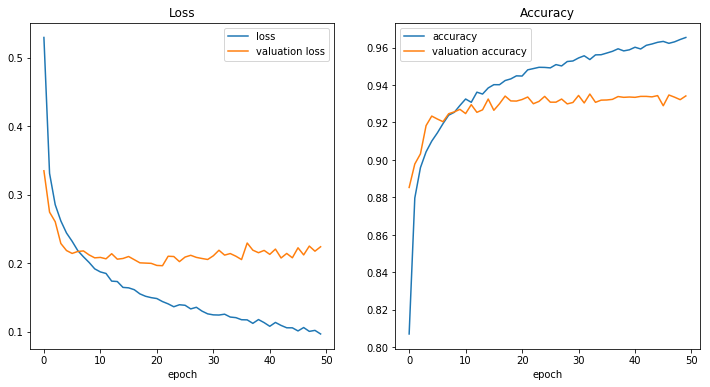

In [13]:
history=result0.history
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.plot(history["loss"],label="loss")
plt.plot(history["val_loss"],label="valuation loss")
plt.title('Loss')
plt.xlabel('epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history["acc"],label="accuracy")
plt.plot(history["val_acc"],label="valuation accuracy")
plt.title('Accuracy')
plt.xlabel('epoch')
plt.legend()

In [14]:
Y_pred=np.argmax(model.predict(images_val.reshape(-1,28,28,1)),axis=1)
np.mean(Y_pred==labels_val)

0.9341666666666667

## Testing

In [15]:
result=model.fit(images.reshape(-1,28,28,1), labels,
                    epochs=epochs,
                    verbose=0,callbacks=[LoggingCallback(10,logger)],
                    validation_data=(test_images.reshape(-1,28,28,1),test_labels)
                   )

2019-04-21 22:37:07,053|	0: TRAIN loss 0.1454,  acc 0.9519  ||  VAL loss 0.2182, acc 0.9304
2019-04-21 22:39:36,880|	10: TRAIN loss 0.1122,  acc 0.9599  ||  VAL loss 0.2088, acc 0.9350
2019-04-21 22:42:06,674|	20: TRAIN loss 0.1013,  acc 0.9642  ||  VAL loss 0.2277, acc 0.9361
2019-04-21 22:44:36,371|	30: TRAIN loss 0.0953,  acc 0.9668  ||  VAL loss 0.2298, acc 0.9335
2019-04-21 22:47:06,331|	40: TRAIN loss 0.0837,  acc 0.9711  ||  VAL loss 0.2454, acc 0.9351


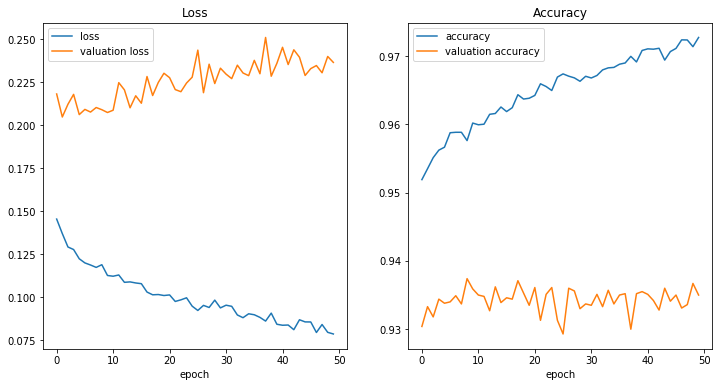

In [16]:
history=result.history
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.plot(history["loss"],label="loss")
plt.plot(history["val_loss"],label="valuation loss")
plt.title('Loss')
plt.xlabel('epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history["acc"],label="accuracy")
plt.plot(history["val_acc"],label="valuation accuracy")
plt.title('Accuracy')
plt.xlabel('epoch')
plt.legend()

In [17]:
Y_pred=np.argmax(model.predict(test_images.reshape(-1,28,28,1)),axis=1)
np.mean(Y_pred==test_labels)

0.935